# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [163]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Notebook Presentation

In [164]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [165]:
apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [166]:
apps.shape

(10841, 12)

The dataframe has 10841 rows and 12 columns.

In [167]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [168]:
apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
6005,Google I/O 2018,BOOKS_AND_REFERENCE,4.30,22401,4.60,"500,000",Free,0,Everyone,Books & Reference,"May 7, 2018",5.0 and up
6923,Seven - 7 Minute Workout Training Challenge,HEALTH_AND_FITNESS,4.50,75571,8.80,"1,000,000",Free,0,Everyone,Health & Fitness,"August 3, 2018",Varies with device
4715,DB Browser,TOOLS,3.30,236,0.22,"50,000",Free,0,Everyone,Tools,"September 20, 2011",2.1 and up
1773,Égalité et Réconciliation,NEWS_AND_MAGAZINES,4.90,58,3.80,500,Paid,$2.99,Everyone,News & Magazines,"May 26, 2018",5.0 and up
4376,AR Dragon Pet,FAMILY,NaN,0,19.00,"50,000",Free,0,Everyone,Casual,"November 9, 2017",Varies with device


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [169]:
apps.drop(["Last_Updated", "Android_Ver"], axis = 'columns', inplace= True)

In [170]:
apps.shape

(10841, 10)

The number of columns is now 10, indicating that the 2 specified columns were dropped from the dataframe.

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [171]:
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

Only the Rating column has NaN values. 1474 values are NaN, so we will drop these values because in the grand scheme of things its only about 13% of the data. Filling these values with 0 or average might skew the rating data so its better to just drop these.

In [172]:
apps_clean = apps.dropna()

In [173]:
apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [174]:
apps_clean.duplicated().sum()

476

There are about 476 rows that are duplicates of each other.

In [175]:
print(apps_clean[apps_clean.duplicated()].head())

                                             App Category  Rating  Reviews  \
946                       420 BZ Budeze Delivery  MEDICAL    5.00        2   
1133                                 MouseMingle   DATING    2.70        3   
1196  Cardiac diagnosis (heart rate, arrhythmia)  MEDICAL    4.40        8   
1231                                Sway Medical  MEDICAL    5.00        3   
1247              Chat Kids - Chat Room For Kids   DATING    4.70        6   

      Size_MBs Installs  Type   Price Content_Rating   Genres  
946      11.00      100  Free       0     Mature 17+  Medical  
1133      3.90      100  Free       0     Mature 17+   Dating  
1196      6.50      100  Paid  $12.99       Everyone  Medical  
1231     22.00      100  Free       0       Everyone  Medical  
1247      4.90      100  Free       0     Mature 17+   Dating  


In [176]:
apps_clean[apps_clean["App"]=="MouseMingle"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1132,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating


Checking a value from the duplicate rows, MouseMingle has 2 entried in the dataset with the same values but different index. This data is redundant and should be dropped before the main analysis.

In [177]:
apps_clean[apps_clean["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


Instagram also seems to have 4 different values with slight differences in reviews column only. So we will choose to drop duplicates selecting columns which matter the most.

In [178]:
apps_clean = apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])

In [179]:
apps_clean[apps_clean["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [180]:
apps_clean.shape

(8199, 10)

The duplicate apps have been dropped including the ones with slight differences in irrelevant columns. The new number of rows in the dataframe is 8199.

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [181]:
apps_clean.sort_values(["Rating"],ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
...,...,...,...,...,...,...,...,...,...,...
1314,CR Magazine,BUSINESS,1.00,1,7.80,100,Free,0,Everyone,Business
1932,FE Mechanical Engineering Prep,FAMILY,1.00,2,21.00,"1,000",Free,0,Everyone,Education
357,Speech Therapy: F,FAMILY,1.00,1,16.00,10,Paid,$2.99,Everyone,Education
818,Familial Hypercholesterolaemia Handbook,MEDICAL,1.00,2,33.00,100,Free,0,Everyone,Medical


Ratings alone can't determine the quality of an app, this is due to the fact that rating is an average of how a number of people have liked or disliked an app. So if an app is only rated by one person and has a rating of 5 that would mean that only 1 person who used the app liked its quality. As the number of installs and reviews increase, even apps that are highly succesfull might fall some points in rating because not everyone will like the app. 

We can see an example of this in the data above. The top 3 apps have less reviews and high ratings, and the lowest rated aoos have even lesser reviews some even have 1. This shows that one person used the app and gave it a lower rating, but this review is subjective. Hence, ratings do contribute to the quality of an app, but on their own ratings are subjective and don't represent the quality accurately.

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [182]:
apps_clean.sort_values(["Size_MBs"],ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


The largest apps are 100 MB. Based on the data it seems like 100 MB is the cap value of how large an app can be on the android app store.

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [183]:
apps_clean.sort_values(["Reviews"],ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


The top 4 apps that have the most reviews are social media and connunication apps, coincidentally all owned by meta. The fifth most reviewed app is clash of clans.

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [184]:
content_ratings = apps_clean["Content_Rating"].value_counts()
content_ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [185]:
pie = px.pie(labels=content_ratings.index, values=content_ratings.values, width=550, height=400, title='Content Ratings', names=content_ratings.index)
pie.update_traces(textinfo="percent+label")
pie.show()

/opt/homebrew/lib/python3.9/site-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [186]:
pie = px.pie(labels=content_ratings.index, values=content_ratings.values, width=550, height=400, title='Content Ratings', names=content_ratings.index, hole=0.6)
pie.update_traces(textinfo="percent+label")
pie.show()

Pie charts show the frequencies of each rating relative to each other by assigning percentage to each rating. Most of the content ratings are for Everyone. Mature and adults apps are less in number and make upto about 5% of the total apps, there are also some 10+ and unrated apps in the data as well.

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [187]:
apps_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_MBs          float64
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [188]:
apps_clean["Installs"] = apps_clean["Installs"].str.replace(",", "")
apps_clean["Installs"] = pd.to_numeric(apps_clean["Installs"])

In [189]:
apps_clean["Installs"].value_counts().sort_index(ascending=False)

1000000000      20
500000000       24
100000000      189
50000000       202
10000000       933
5000000        607
1000000       1417
500000         504
100000        1096
50000          457
10000          988
5000           425
1000           698
500            199
100            303
50              56
10              69
5                9
1                3
Name: Installs, dtype: int64

In [190]:
apps_clean[apps_clean["Installs"]==1000000000]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10783,Google Play Books,BOOKS_AND_REFERENCE,3.90,1433233,5.70,1000000000,Free,0,Teen,Books & Reference
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,1000000000,Free,0,Everyone,Communication
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,1000000000,Free,0,Everyone,Communication
10786,Google Chrome: Fast & Secure,COMMUNICATION,4.30,9642995,3.50,1000000000,Free,0,Everyone,Communication
10787,Gmail,COMMUNICATION,4.30,4604324,3.50,1000000000,Free,0,Everyone,Communication
10788,Hangouts,COMMUNICATION,4.00,3419249,3.50,1000000000,Free,0,Everyone,Communication
10792,Skype - free IM & video calls,COMMUNICATION,4.10,10484169,3.50,1000000000,Free,0,Everyone,Communication
10803,Google Play Games,ENTERTAINMENT,4.30,7165362,9.35,1000000000,Free,0,Teen,Entertainment
10805,Facebook,SOCIAL,4.10,78158306,5.30,1000000000,Free,0,Teen,Social
10806,Instagram,SOCIAL,4.50,66577313,5.30,1000000000,Free,0,Teen,Social


There are 20 apps that have had a billion or more installs and only 3 apps with only 1 install. Most of the apps in the 1 billion club are apps from google and facebook related to utility and communication. Subway surfers is the only game that made it to the top 20 billion installs apps. 

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [191]:
apps_clean["Price"]=apps_clean["Price"].str.replace("$", "")
apps_clean["Price"]=pd.to_numeric(apps_clean["Price"])

/var/folders/_6/dvzl7bvj0p11fqcttz084f880000gp/T/ipykernel_46852/2018737925.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [192]:
apps_clean.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
4283,Account Class-12 Solutions (D K Goel) Vol-1,FAMILY,4.40,708,33.00,50000,Free,0.00,Everyone,Education
5834,European War 5:Empire,FAMILY,3.80,9513,82.00,100000,Free,0.00,Everyone 10+,Strategy
5433,Female Daily,BEAUTY,3.90,4354,42.00,100000,Free,0.00,Teen,Beauty
4434,Cardi B Wallpaper,ART_AND_DESIGN,4.80,253,3.70,50000,Free,0.00,Everyone,Art & Design
8340,Wisepilot for XPERIA™,TRAVEL_AND_LOCAL,3.70,21443,12.00,5000000,Free,0.00,Everyone,Travel & Local


We needed to remove the '$' symbol from the price before changing the price column to numeric.

### The most expensive apps sub $250

In [193]:
apps_clean[apps_clean["Price"] > 250]["Price"].count()

15

These are the 'I am rich' apps. We don't want to include these in our Revenue analysis, so we will remove these before proceeding.

In [194]:
print(apps_clean.shape)
apps_clean = apps_clean[apps_clean["Price"] < 250]
print(apps_clean.shape)

(8199, 10)
(8184, 10)


Dropped the rows with price $250 or higher.

### Highest Grossing Paid Apps (ballpark estimate)

In [195]:
apps_clean["Revenue_Estimate"] = apps_clean["Installs"]*apps_clean["Price"]
apps_clean.sort_values(by=["Revenue_Estimate"], ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


According to the catagory tags, it looks like only 4 out of the top 10 highest grossing apps are games but actually 3 of the apps tagged in the family catagory are also games, with minecraft being the top grossing app in the whole app store. So a total of 7 out of the 10 top earners are games.

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

### Vertical Bar Chart - Highest Competition (Number of Apps)

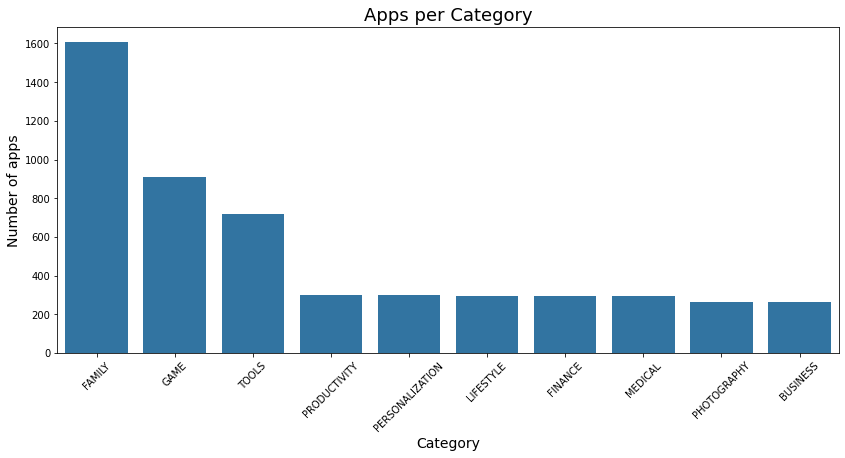

In [196]:
plt.figure(figsize=(14,6))
sns.barplot(apps_clean["Category"].value_counts()[:10])
plt.title("Apps per Category", fontsize = 18)
plt.xlabel("Category", fontsize = 14)
plt.ylabel("Number of apps", fontsize = 14)
plt.xticks(rotation=45)
plt.show()

In [197]:
category_counts = apps_clean["Category"].value_counts()
category_counts_10 = category_counts.head(10)
category_counts_10

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [198]:
bar = px.bar(x = category_counts_10.index, y = category_counts_10.values, title = "Apps per Category", labels={'x': 'Category', 'y': 'Number of apps'})
bar.update_layout(title_x=0.5)
bar.show()

<i>Making the same graph using Seaborn and Plotly show us the main differences between the libraries, on one hand seaborn is easy to use but on the other we can only make customizations easily is we use matplotlib in combination. Meanwhile, plotly does it all on its own, it also offers interactive interface where we can hover and see the actual value of number of apps per category.</i>

Looking at the graph we can see that Family, Game and Tools categories are the most saturated. That means we already have many apps that exist in these catagories, but just seeing the saturation should just be a partial measure in deciding what category of apps would be the most successful on the app store. Looking at this right now is counterintuitive and pushes us in the direction against making a family, game or tools app. Many things like the revenue generated by category and also the number of downloads per category will further contribute to the decision.

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [209]:
category_downloads = apps_clean.groupby("Category")["Installs"].sum().sort_values(ascending=False)
category_downloads_10 = category_downloads.head(10)
category_downloads_10

Category
GAME                  13858762717
COMMUNICATION         11039241530
TOOLS                  8099724500
PRODUCTIVITY           5788070180
SOCIAL                 5487841475
PHOTOGRAPHY            4649143130
FAMILY                 4437554490
VIDEO_PLAYERS          3916897200
TRAVEL_AND_LOCAL       2894859300
NEWS_AND_MAGAZINES     2369110650
Name: Installs, dtype: int64

In [210]:
bar = px.bar(x = category_downloads_10.index, y = category_downloads_10.values, title = "Installs per Category", labels={'x': 'Category', 'y': 'Number of Installs'})
bar.update_layout(title_x=0.5)
bar.show()

In [211]:
category_revenue = apps_clean.groupby("Category")["Revenue_Estimate"].sum().sort_values(ascending=False)
category_revenue_10 = category_revenue.head(10)
category_revenue_10

Category
FAMILY            103,734,057.70
GAME               40,687,840.88
PHOTOGRAPHY         8,546,049.80
PERSONALIZATION     6,796,309.80
LIFESTYLE           6,205,149.40
MEDICAL             5,872,355.00
TOOLS               5,462,910.30
SPORTS              4,706,154.00
PRODUCTIVITY        4,304,451.90
COMMUNICATION       4,247,100.00
Name: Revenue_Estimate, dtype: float64

In [212]:
bar = px.bar(x = category_revenue_10.index, y = category_revenue_10.values, title = "Revenue per Category", labels={'x': 'Category', 'y': 'Revenue Generated'})
bar.update_layout(title_x=0.5)
bar.show()

Many categories in the anlysis of Number of apps, most installed apps and highest grossing apps overlap but we can see that family, game and tools are generally highly successful across all catagories. Amongst this family is only high revenue generating because minecraft (actually a game) is tagged as a family app. 

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [219]:
category_grouped = apps_clean.groupby("Category").agg([Installs =('Installs', 'sum'), App_count =('Category', 'count')]).sort_values(by = ["Installs"], ascending=False)

SyntaxError: invalid syntax (2275758219.py, line 1)

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.